# Introduktion 
Syftet med denna laboration är att förutsäga hjärt- och kärl sjukdomar som baseras på hälsodata. Detta Dataset består av 70000 patienter med respektive hälsoparametrar. Dessa parametrar består av ålder, kön, kolestrol, rökning, aktivitet, längd, vikt, över- och undertryck (blodtryck), alkoholintag samt glukosvärden. Cardio blir responsvariabeln. Datan innehåller en del extremvärden, till exempel onormalt höga blodtryck. Detta hanteras med filtrering och transformering.

In [2]:
from Laboration_cardio import DiseasePrediction, ModelTraining

DP = DiseasePrediction()

df = DP.load_data()
MT = ModelTraining(df)

DP.feature_engineer_bmi()
DP.feature_engineer_bp()

print(df.shape)

Antal rader före filtrering: 69928
Antal rader efter filtrering: 68059
(70000, 13)


# Explorativ Data analys

Tårtdiagrammet nedan visar fördelningen mellan kolestrolnivåer i samband med positivt andel hjärt- och kärlsjukdom. Denna fördelning ger en indikation på hur stor andel av patienterna som har förhöjt kolestrol. 
Andelen hjät- och kärlsjukdomar som är negativa och positiva är nästintill jämnt fördelat. 

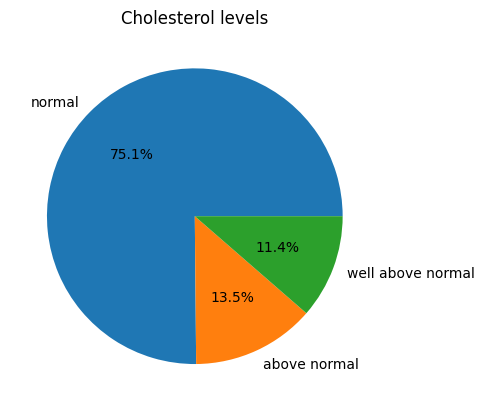

cardio
Negative    35021
Positive    34979
Name: count, dtype: int64


In [3]:
DP.piechart_cholesterol()
print(df.value_counts("cardio"))

Åldersdistribution mellan kön verkar relativt jämn. Kvinnor har högre representation mellan 50-60 år. Troligtvis beror detta på mängden patienter som är just kvinnor i den åldersgruppen.

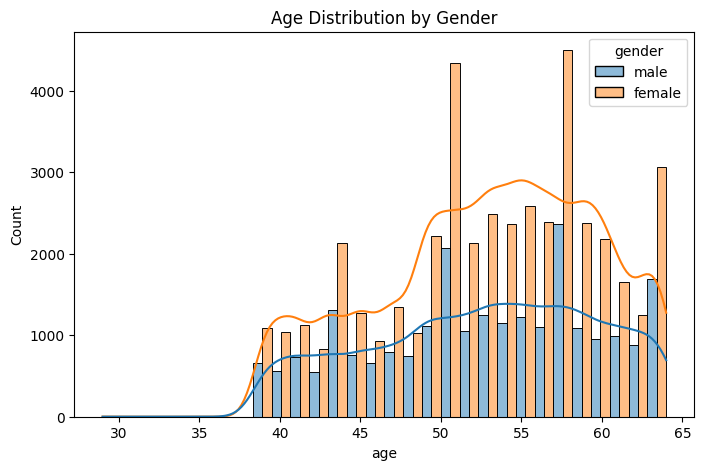

In [4]:
DP.plot_age_distribution()

Som synes i diagrammet ovan så är kvinnor i åldrarna 50-60 högre representerade. Detta gäller även bland rökare i diagrammet nedan. Ett definitivt samband. Antal rökare minskar efter åldern 60, något mer hos män. 
Antalet rökare bland dessa patienter är 8.77%. Rökning är en känd riskfaktor för hjärt- och kärlsjukdomar. 

Number of smokers: 8.77%


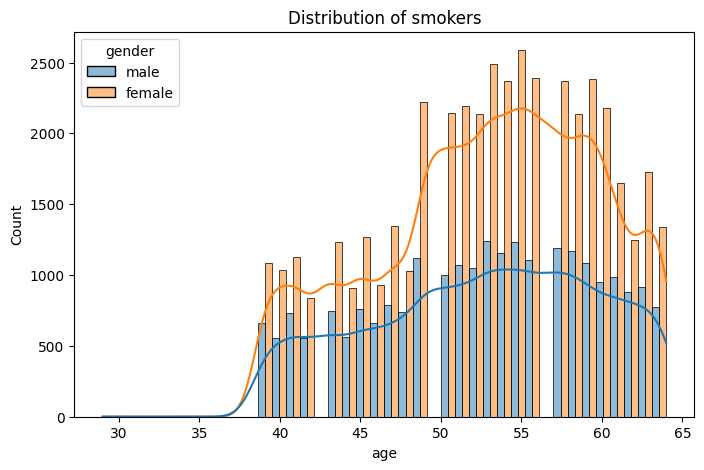

In [5]:
DP.number_of_smokers()

En förväntad skillnad är att fördelningarna av vikt och längd visar att män är längre och väger mer än kvinnor. BMI beräknas baserat på både vikt och längd, vilket gör dessa skillnader viktiga. Det finns en positiv korrelation mellan vikt och längd, där längre individer ofta väger mer. BMI är inte en exakt indikator på hälsa, då det inte skiljer på muskelmassa och kroppsfett. Ett högt BMI kan därför också bero på hög muskelmassa, inte bara övervikt. Till exempel så kan en patient vara fysiskt aktiv men använda sig av PED's(Performance enhancing drugs) som också ökar risken för hjärt- och kärlsjukdomar.

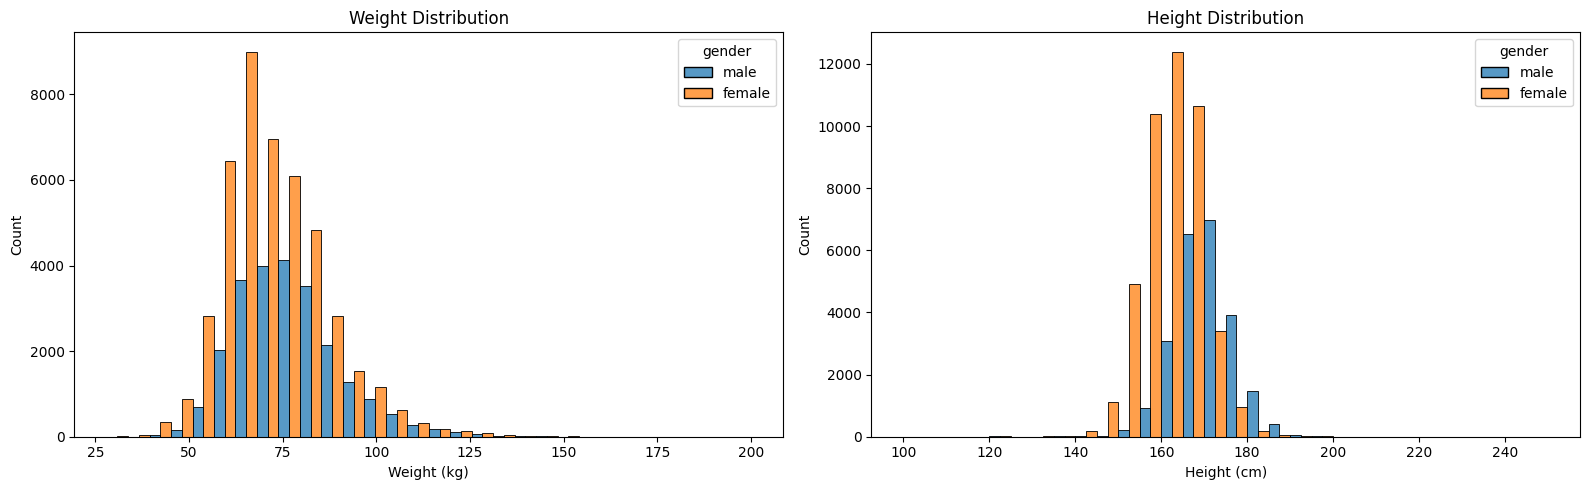

In [6]:
DP.weight_height_subplots()

Fördelningen mellan kön och positivt andel hjärt- och kärlsjukdomar är jämn. Vilket betyder att det egentligen inte spelar någon roll vilket kön man är. Det är alltså de andra parametrarna som är avgörande. 

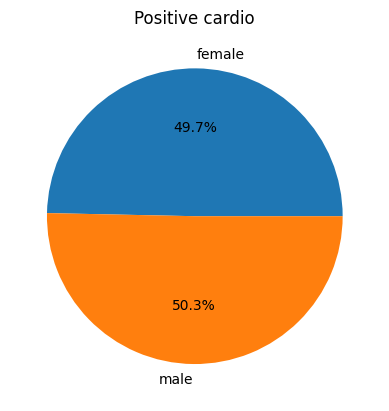

In [7]:
DP.gender_cardio()

# Feature Engineering BMI och Blodtryck

$$BMI = \frac{vikt (kg)}  {längd^2}$$



För att bättre förstå BMI och dess samband med hjärt- och kärlsjukdomar används formeln ovan. Kategorierna och dess parametrar skapades enligt de internationella riktlinjerna från WHO. Filtrering av för låga eller för höga BMI-värden sattes för att utesluta extremvärden. Mer specifikt så togs alla värden under 10 och alla värden över 60 bort eftersom detta inte är represenativt för de genomsnittliga urvalet av patienter. En del värden kändes helt enkelt inte realistiska nog att ha med. 

Blodtrycksdata (ap_hi = systoliskt, ap_lo = diastoliskt) alltså över- och undertryck, hanterades genom att kategoriseras efter Healthline's tabell. 
Metoden IQR(interkvartilavståndet) användes som lämplig filtrering för extremvärden. 
IQR=Q3−Q1 är formeln som användes. Beräknas som skillnaden mellan den tredje kvartilen och den första kvartilen.
En något mindre sträng gräns valdes då det fanns risk att ta bort för mycket data. 

# Correlation Heatmap

En heatmap för att tydligt se korrelationer mellan de olika egenskaperna. Som väntat syns ett tydligt samband mellan längd,vikt och BMI. 
Det finns ett samband mellan blodtryck och ålder. Blodtrycket ökar med åldern. 

Datasetet innehåller svaga negativa korrelationer vilket kan vara ett resultat av datasetet och dess egenskaper. Egenskaperna förmodas vara utvalda av anledning till att det har starka korrelationer. Alltså att egenskaperna är med för att det finns direkta samband och inte tvärtom.  

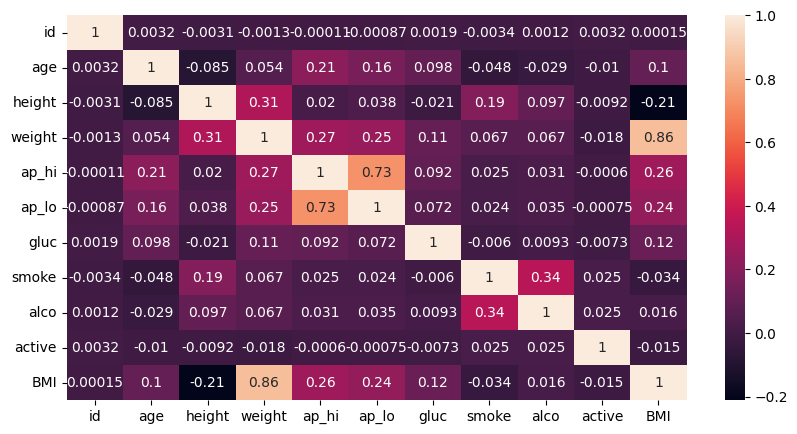

In [8]:
DP.correlation_heat_map()

# Visualisering av andelar positiva hjärt- och kärlsjukdomar

Andel positiva diagnoser visas i diagrammen nedan och ger en bra överblick över flera samband efter de olika kategorierna för blodtryck, BMI, kolestrol och aktivitet. 
Vid närmare analys syns det att de positiva fall är övervägande då Hypertension stage 2, Obese Class 2, Well above normal är högst representerade. Detta betyder att det finns en tydlig korrelation och att dessa egenskaper har en direkt påverkan på andel positiva hjärt- och kärlsjukdomar. 
Aktivitet visar sig ha en positiv påverkan, dock ingen markant skillnad. 

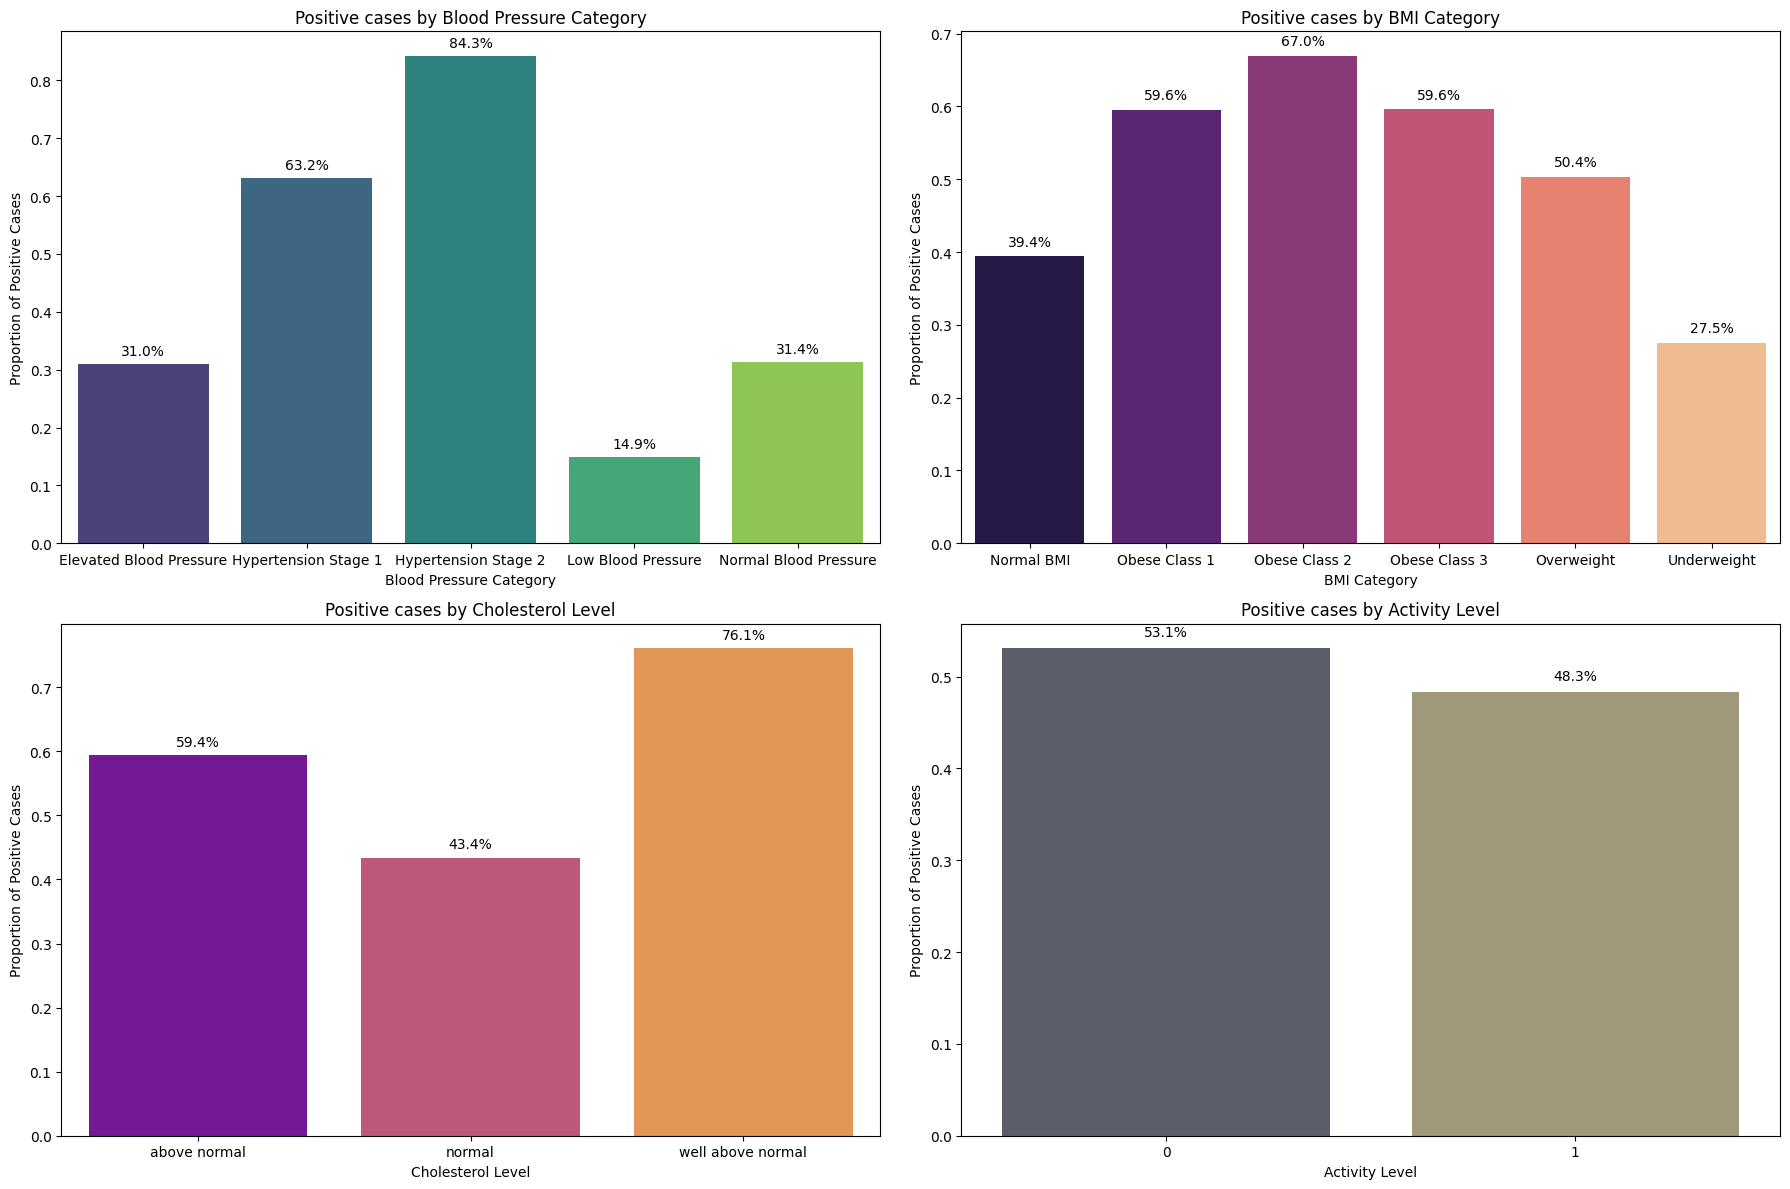

In [9]:
DP.visualize_diseases()

# Utförande maskininlärning

Processen börjar med att skapa två kopior på det orginella datasetet. Då datan innehåller en hel del kategoriska variabler så utförs One-Hot encoding. Omvandling sker och variablerna får nu binära värden istället. 

Målet var att hitta en sorts balans mellan enkelhet och komplexitet. Att använda en modell som var bra för linjärt separerbar data, en annan som var bättre att hantera obalanserade dataset och en som fungerar bra på icke-linjära samt komplexa problem.
KNN och SVM testades men visade sig vara mer kostsamt för både tid och datorkraft. 
Därför valdes LogisticRegression, RandomForest och GradientBoosting som det mest praktiska modellerna. 

För att undvika overfit för modellerna så delas datan upp i träningsdata för att träna, valideringsdata används för att justera hyperparametrar och testdata för att utvärdera modellernas slutgiltiga prestanda. Uppdelningen är 70/15/15.

Datan skalas sedan med standardisering och normalisering eftersom vissa modeller kan vara mer känsliga för skala, till exempel GradientBoosting. 

De bästa möjliga parametrarna hittas genom att använda GridSearchCV.
Efter hyperparameteroptimeringen modellerna tränats på träningsdatan och en utvärdering för prestanda har gjorts via valideringsdatan. Detta mäts med accuracy och ger en tydlig uppfattning om vilken modell som presterar bäst. 

För att ge ytterligare resultat används VotingClassifier där en majoritetsröstning sker om vilken modell som är bäst. 
Classification reporten nedan visar ytterligare mått på prestanda, så som recall och f1-score.

Slutligen visas en ConfusionMatrix som ger en överblick över modellens styrkor och svagheter. Confusion matrix visar antalet sanna positiva, falska positiva, sanna negativa och falska negativa för den modellen som presterade bäst.


Hänvisning till kod vid mer utförlig undersökning.

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      5182
           1       0.75      0.67      0.71      5027

    accuracy                           0.73     10209
   macro avg       0.73      0.73      0.73     10209
weighted avg       0.73      0.73      0.73     10209



array([[4070, 1112],
       [1642, 3385]], dtype=int64)

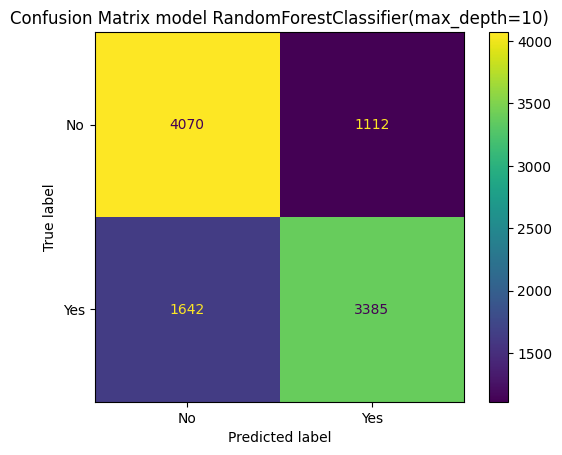

# Slutsats och diskussion

$Accuracy = \frac{TP + TN} {TP + TN + FP + FN}$   

$Precision = \frac{TP} {TP + FP}$      

$Recall = \frac{TP} {TP + FN}$ 

4070 (True Negatives, TN) – Antal gånger modellen korrekt klassificerade "No" som "No".

1112 (False Positives, FP) – Antal gånger modellen felaktigt klassificerade "No" som "Yes".

1642 (False Negatives, FN) – Antal gånger modellen felaktigt klassificerade "Yes" som "No".

3385 (True Positives, TP) – Antal gånger modellen korrekt klassificerade "Yes" som "Yes".

Modellen som presterade bäst var RandomForest på dataset nummer 2 med parametrarna {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}. 
Den gav en accuracy på 73%. Modellen är relativt träffsäker men gör fortfarande en del felprediktioner. 
Precisionen för sjuka är 75% vilket betyder att modellen klassar 25% sjuka som egentligen är friska. 

Recall för sjuka visar 67% vilket betyder att modellen missar 33% av verkligt sjuka patienter.
Recall för friska visar 79% vilket betyder att modellen missar 21% felaktigt klassas som friska. 
F1-score visar 0.73 vilket tyder på en balans mellan precision och recall. 



För framtida analyser så skulle det vara intressant att se hur olika faktorer påverkar val samt prestanda på vald modell. 

Resultat av att pröva andra modeller så som Neurala nätvärk? I medicinska sammanhang, är precisionen det viktigaste eller är färre missade sjuka målet?
Hur hade resultatet sett ut med ett annat stickprov av patienter? 
Är dessa egenskaper i datasetet tillräckligt eller behövs ytterligare egenskaper så som genetik och stressnivåer?

Modellen bör inte användas i medicinska syften då den missar 27% av de som är sjuka. Så det finns definitivt förbättringspotential. 



